<a href="https://colab.research.google.com/github/yudhiesh1997/Tensorflow-Tutorial/blob/master/Lab2Pt1MIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf 

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
#assert len(tf.config.list_physical_devices('GPU')) > 0

In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11493376/11490434 [==============================] - 0s 0us/step


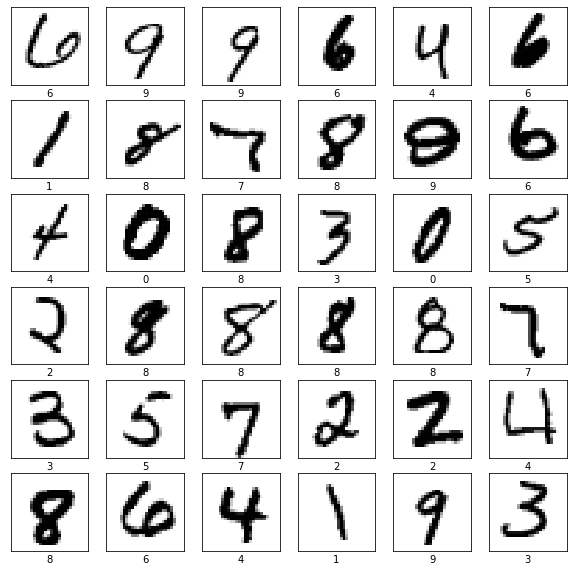

In [4]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image_ind = random_inds[i]
  plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
  plt.xlabel(train_labels[image_ind])

In [0]:
# Fully connected neural network architectures
def build_fc_model():
  fc_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    # Activation fucntion for the 1st layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 2nd Dense Layer 
    # 10 is for the 10 numbers we have 
    tf.keras.layers.Dense(10, activation='softmax')
  ])
  return fc_model
model = build_fc_model()

In [0]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [10]:
BATCH_SIZE = 64
EPOCHS = 5
model.fit(train_images, train_labels, batch_size=BATCH_SIZE,epochs=EPOCHS)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3720 - accuracy: 0.8967
Epoch 2/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1994 - accuracy: 0.9424
Epoch 3/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1508 - accuracy: 0.9573
Epoch 4/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.1219 - accuracy: 0.9651
Epoch 5/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.1029 - accuracy: 0.9713


In [11]:
# Evaluate test accuracy 
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose =1 )
print("Test accuracy :", test_acc)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.1023 - accuracy: 0.9705
Test accuracy : 0.9705


In [16]:
# Accuracy on test dataset is lower than accuracy on the training dataset
# This is an example of overfitting
# We can go deeper using CNN

def build_cnn_model():
  cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(filters=36, kernel_size=(2,2), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  return cnn_model
cnn_model = build_cnn_model()
cnn_model.predict(train_images[[0]])
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  240       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  3492      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten_3 (Flatten)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  12970     
Total params: 16,702
Trainable params: 16,702
Non-trainable params: 0
__________________________________________________

In [0]:
# Train and test the CNN model 
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss=tf.keras.losses.sparse_categorical_crossentropy,
                  metrics = ['accuracy'])

In [20]:
# Train our CNN using fit method 
cnn_model.fit(train_images, train_labels, batch_size = BATCH_SIZE, epochs= EPOCHS)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 27s 450us/sample - loss: 0.2608 - accuracy: 0.9255
Epoch 2/5
60000/60000 [==============================] - 26s 441us/sample - loss: 0.0742 - accuracy: 0.9779
Epoch 3/5
60000/60000 [==============================] - 27s 448us/sample - loss: 0.0556 - accuracy: 0.9828
Epoch 4/5
60000/60000 [==============================] - 27s 447us/sample - loss: 0.0448 - accuracy: 0.9863
Epoch 5/5
60000/60000 [==============================] - 27s 443us/sample - loss: 0.0392 - accuracy: 0.9877


In [21]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print("Test accuracy :" , test_acc)

10000/10000 [==============================] - 2s 236us/sample - loss: 0.0407 - accuracy: 0.9864
Test accuracy : 0.9864


In [0]:
# With the model trained lets make some predictions 
predictions = cnn_model.predict(test_images)

In [23]:
predictions[0]

array([1.2680311e-10, 8.0703799e-09, 3.7998694e-07, 4.8577044e-06,
       1.6590498e-10, 2.8745037e-10, 3.8271063e-16, 9.9998832e-01,
       6.9754384e-09, 6.4732621e-06], dtype=float32)

In [24]:
# A prediction is an array of 10 numbers
# This represents the confidence the system has

prediction = np.argmax(predictions[0])
print(prediction)

7


Label of this digit is: 7


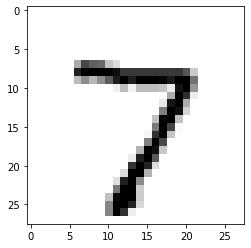

In [25]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

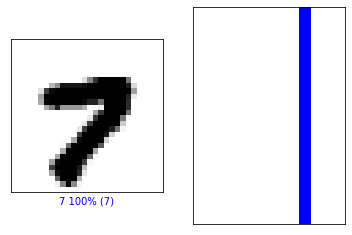

In [26]:
# Lets visualise the classification results on the MNIST dataset
image_index = 79
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)

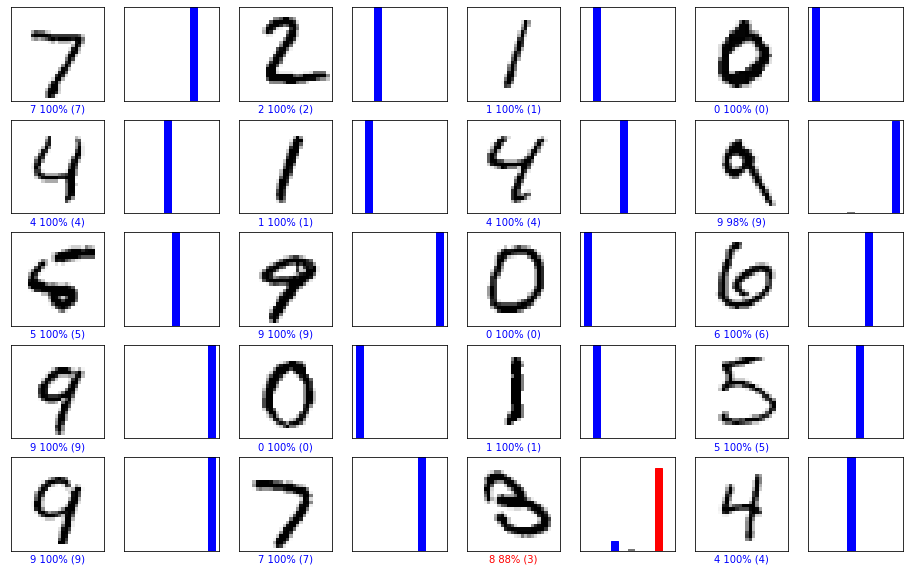

In [27]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows =5
num_cols =4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)

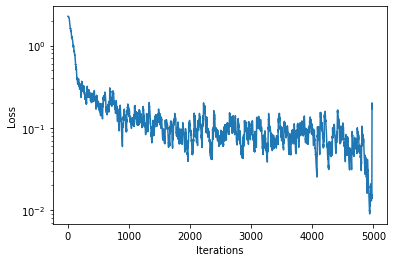

100%|██████████| 5000/5000 [01:23<00:00, 59.93it/s]


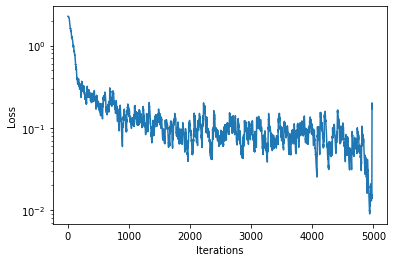

In [33]:
# Rebuild the CNN model
cnn_model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95) # to record the evolution of the loss
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2) # define our optimizer

if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
  # First grab a batch of training data and convert the input images to tensors
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)

  # GradientTape to record differentiation operations
  with tf.GradientTape() as tape:
    #'''TODO: feed the images into the model and obtain the predictions'''
    logits = cnn_model(images)
    # logits = # TODO

    #'''TODO: compute the categorical cross entropy loss
    loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits)
    # loss_value = tf.keras.backend.sparse_categorical_crossentropy() # TODO

  loss_history.append(loss_value.numpy().mean()) # append the loss to the loss_history record
  plotter.plot(loss_history.get())

  # Backpropagation
  '''TODO: Use the tape to compute the gradient against all parameters in the CNN model.
      Use cnn_model.trainable_variables to access these parameters.''' 
  grads = tape.gradient(loss_value, cnn_model.trainable_variables)
  # grads = # TODO
  optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))